In [2]:
import keras
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization


> # **Load CIFAR 10 DataSet**

In [3]:
import keras

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [4]:
x_train=x_train/255
x_test=x_test/255

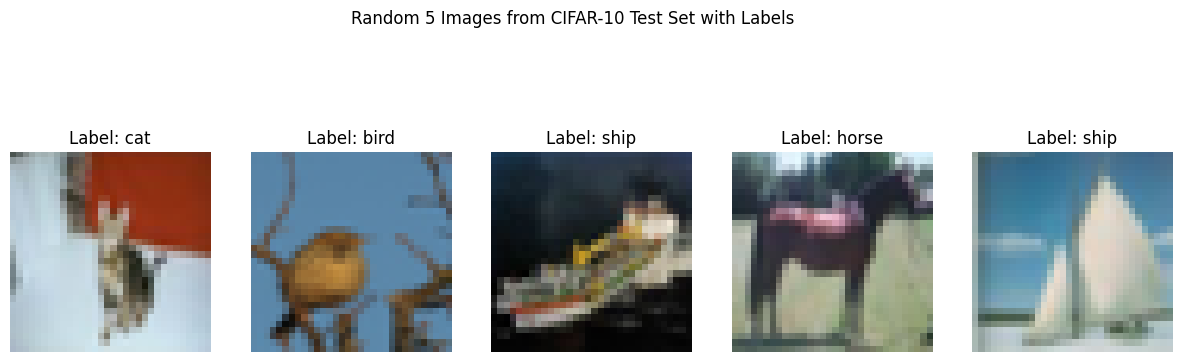

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Define CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Get 5 random indices from the test set
num_images_to_show = 5
random_indices = np.random.choice(x_test.shape[0], num_images_to_show, replace=False)

plt.figure(figsize=(15, 5))
for i, idx in enumerate(random_indices):
    plt.subplot(1, num_images_to_show, i + 1)
    plt.imshow(x_test[idx])
    plt.title(f"Label: {class_names[y_test[idx][0]]}") # y_test is (N,1), so access with [idx][0]
    plt.axis('off')
plt.suptitle('Random 5 Images from CIFAR-10 Test Set with Labels')
plt.show()

> # **CNN Model CIFAR 10 DataSet**

In [ ]:
model = Sequential()

# Block 1
model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

# Block 2
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

# Block 3
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 288,800 (1.10 MB)

 Trainable params: 287,904 (1.10 MB)

 Non-trainable params: 896 (3.50 KB)

In [ ]:
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,345,066 (5.13 MB)

 Trainable params: 1,343,146 (5.12 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-5)

# Training
results = model.fit(
    datagen.flow(x_train, y_train, batch_size=128),
    epochs=50,
    validation_data=(x_test, y_test),
    callbacks=[early_stop, reduce_lr]
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 33s 84ms/step - accuracy: 0.7724 - loss: 0.7056 - val_accuracy: 0.7949 - val_loss: 0.6500 - learning_rate: 0.0010
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 78ms/step - accuracy: 0.8012 - loss: 0.5790 - val_accuracy: 0.8267 - val_loss: 0.5201 - learning_rate: 0.0010
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 30s 77ms/step - accuracy: 0.8155 - loss: 0.5355 - val_accuracy: 0.8090 - val_loss: 0.5753 - learning_rate: 0.0010
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 30s 76ms/step - accuracy: 0.8127 - loss: 0.5364 - val_accuracy: 0.8321 - val_loss: 0.5001 - learning_rate: 0.0010
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 30s 77ms/step - accuracy: 0.8163 - loss: 0.5198 - val_accuracy: 0.8345 - val_loss: 0.5036 - learning_rate: 0.0010
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 30s 76ms/step - accuracy: 0.8289 - loss: 0.4964 - val_accuracy: 0.8383 - val_loss: 0.4933 - learning_rate: 0.0010
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 79ms/step - accuracy: 0.8258 - l

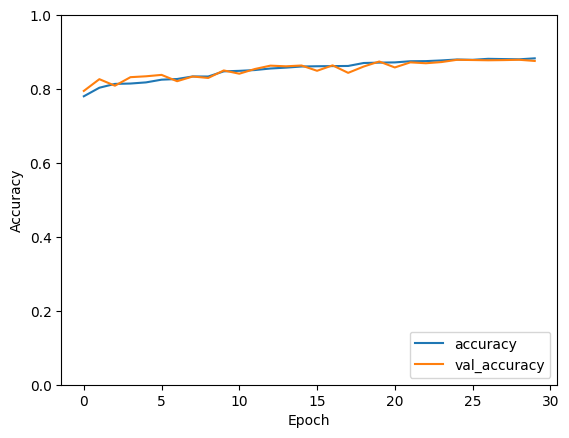

In [ ]:
import matplotlib.pyplot as plt

plt.plot(results.history['accuracy'], label='accuracy')
plt.plot(results.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

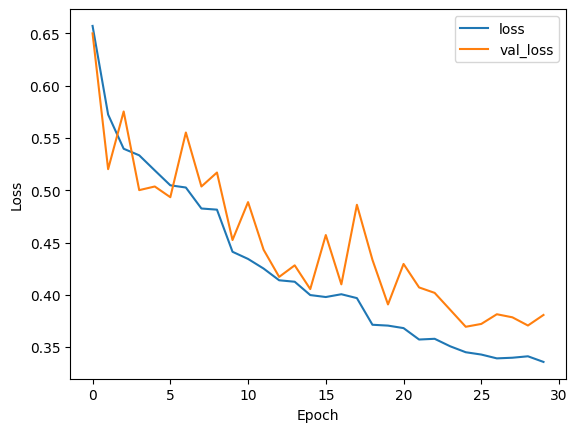

In [ ]:
import matplotlib.pyplot as plt

plt.plot(results.history['loss'], label='loss')
plt.plot(results.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = y_test.flatten() # Flatten y_test if it's in (N, 1) format

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


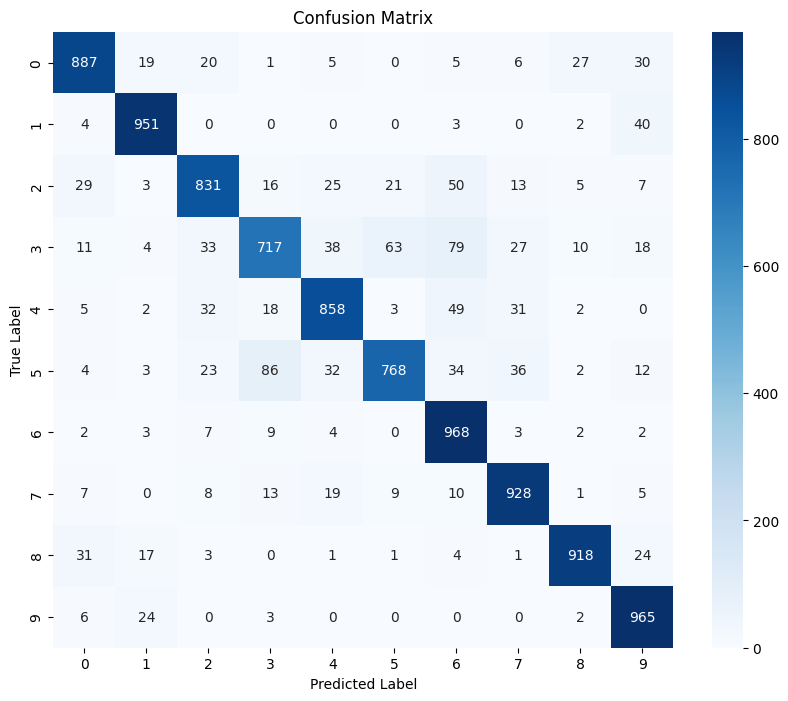

In [ ]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print('Classification Report:')
print(classification_report(y_true, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      1000
           1       0.93      0.95      0.94      1000
           2       0.87      0.83      0.85      1000
           3       0.83      0.72      0.77      1000
           4       0.87      0.86      0.87      1000
           5       0.89      0.77      0.82      1000
           6       0.81      0.97      0.88      1000
           7       0.89      0.93      0.91      1000
           8       0.95      0.92      0.93      1000
           9       0.87      0.96      0.92      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



> # **AutoEncoder MLP model (CIFAR 10 ) without Noise**

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape

In [13]:
# Define the input shape based on the CIFAR-10 images (32, 32, 3)
input_shape = (32, 32, 3)
flattened_dim = 32 * 32 * 3

# Encoder
input_img = Input(shape=input_shape)
flattened_img = Flatten()(input_img)
encoded = Dense(256, activation='relu')(flattened_img)
encoded = Dense(128, activation='relu')(encoded)

# Decoder
decoded = Dense(256, activation='relu')(encoded)
decoded = Dense(flattened_dim, activation='sigmoid')(decoded) # Output pixels are between 0 and 1
output_img = Reshape(input_shape)(decoded)

# Autoencoder model
autoencoder = Model(input_img, output_img)

autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       786,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3072)           │       789,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 32, 32, 3)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,642,112 (6.26 MB)

 Trainable params: 1,642,112 (6.26 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mse') # Using Mean Squared Error for reconstruction

In [17]:
epochs = 50
batch_size = 256

Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.0454 - val_loss: 0.0250
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0234 - val_loss: 0.0200
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0178 - val_loss: 0.0155
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0157 - val_loss: 0.0144
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0143 - val_loss: 0.0135
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0134 - val_loss: 0.0136
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0131 - val_loss: 0.0124
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0125 - val_loss: 0.0122
Epoch 9/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0122 - val_loss: 0.0123
Epoch 10/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0119 - val_loss: 0.0120
Epoch 11/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0116 - val_loss: 0.0114
Epoch 12/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/ste

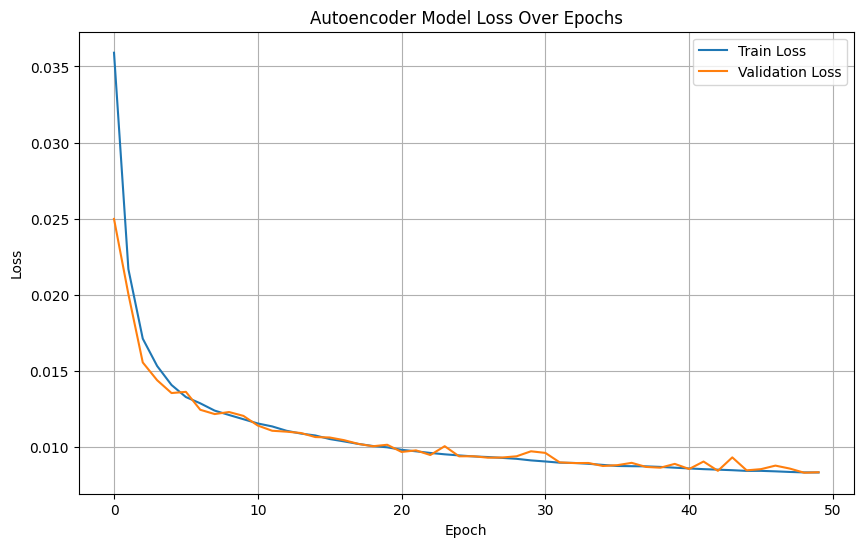

In [ ]:
epochs = 50
batch_size = 256

history_autoencoder = autoencoder.fit(x_train, x_train, # Input and target are the same
                                      epochs=epochs,
                                      batch_size=batch_size,
                                      shuffle=True,
                                      validation_data=(x_test, x_test))

# Plot training & validation loss values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history_autoencoder.history['loss'], label='Train Loss')
plt.plot(history_autoencoder.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


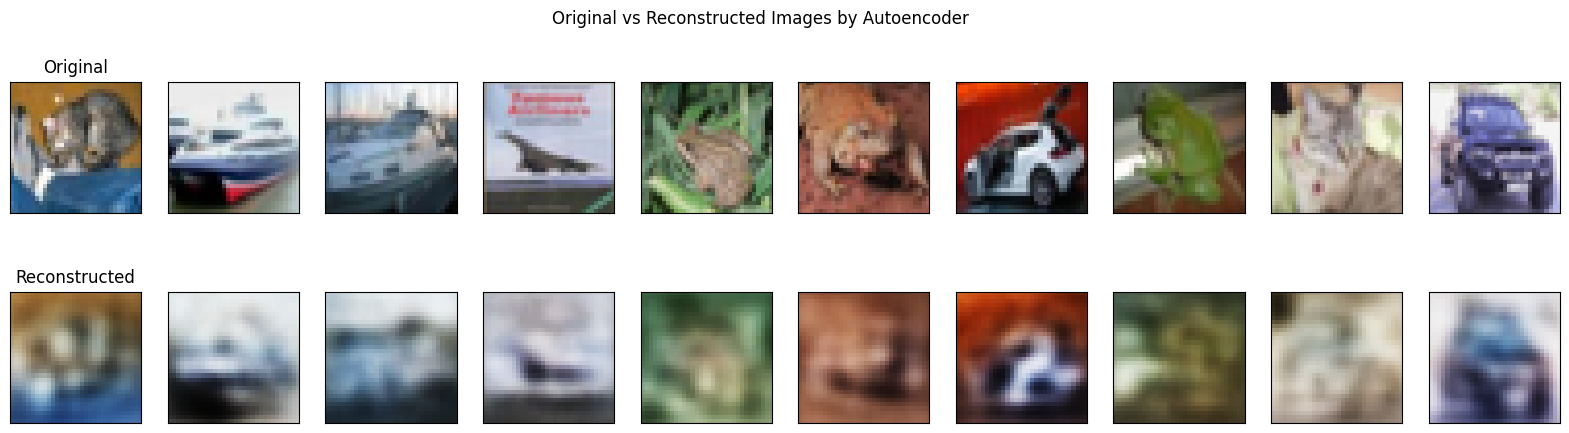

In [ ]:
import matplotlib.pyplot as plt

# Use the autoencoder to reconstruct images from the test set
reconstructed_images = autoencoder.predict(x_test)

# Number of images to display
n = 10
plt.figure(figsize=(20, 5))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i]) # Display original RGB image
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0:
        ax.set_title('Original')

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_images[i]) # Display reconstructed RGB image
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0:
        ax.set_title('Reconstructed')
plt.suptitle('Original vs Reconstructed Images by Autoencoder')
plt.show()

> # **AutoEncoder MLP model (CIFAR 10 ) with Noise**

In [ ]:
# Add random noise to the images
import numpy as np

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip the values to ensure they are still within the [0, 1] range
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

print(f"Shape of x_train_noisy: {x_train_noisy.shape}")
print(f"Shape of x_test_noisy: {x_test_noisy.shape}")

Shape of x_train_noisy: (50000, 32, 32, 3)
Shape of x_test_noisy: (10000, 32, 32, 3)


In [ ]:
epochs_denoise = 50
batch_size_denoise = 256

history_autoencoder = autoencoder.fit(x_train_noisy, x_train, # Input is noisy, target is clean
                                          epochs=epochs_denoise,
                                          batch_size=batch_size_denoise,
                                          shuffle=True,
                                          validation_data=(x_test_noisy, x_test))

Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0338 - val_loss: 0.0180
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0175 - val_loss: 0.0172
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0163 - val_loss: 0.0163
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0157 - val_loss: 0.0156
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0152 - val_loss: 0.0154
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0150 - val_loss: 0.0154
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0149 - val_loss: 0.0151
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0147 - val_loss: 0.0150
Epoch 9/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0146 - val_loss: 0.0150
Epoch 10/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0145 - val_loss: 0.0150
Epoch 11/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0145 - val_loss: 0.0149
Epoch 12/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/ste

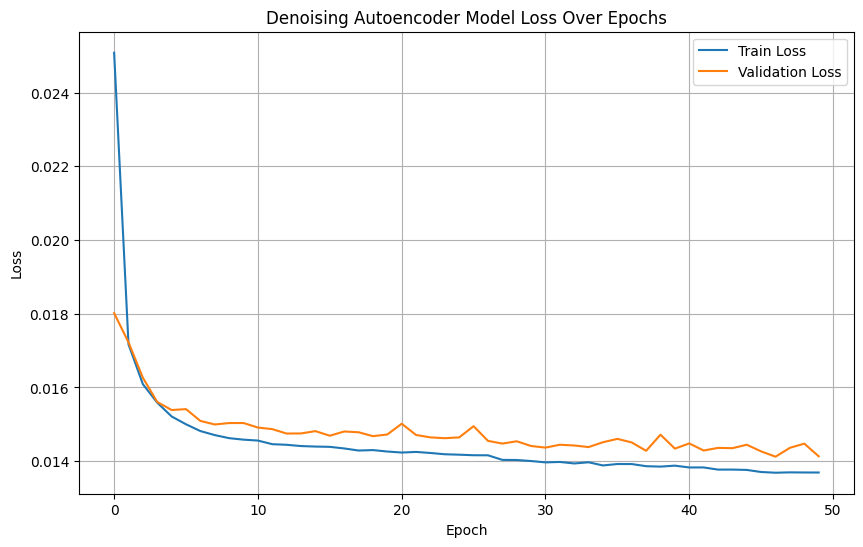

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history_autoencoder.history['loss'], label='Train Loss')
plt.plot(history_autoencoder.history['val_loss'], label='Validation Loss')
plt.title('Denoising Autoencoder Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


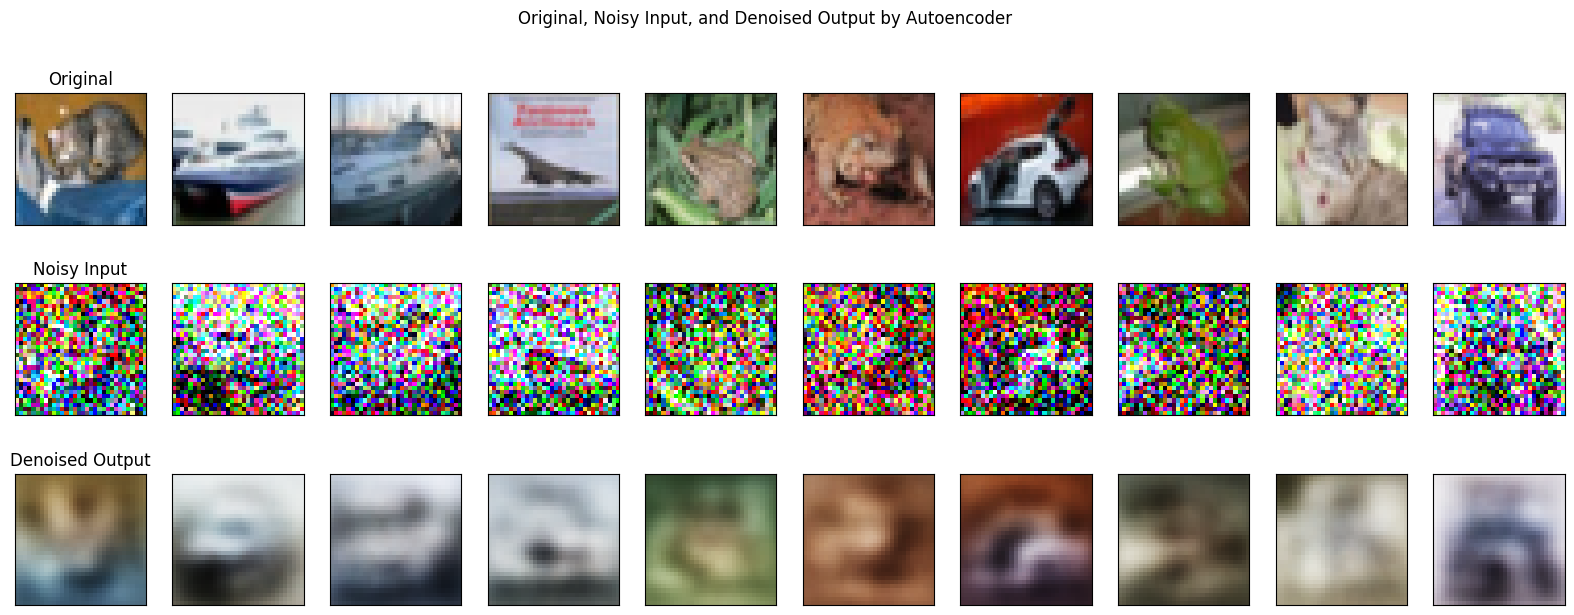

In [ ]:
import matplotlib.pyplot as plt

# Use the autoencoder to reconstruct (denoise) images from the noisy test set
denoised_images = autoencoder.predict(x_test_noisy)

# Number of images to display
n = 10
plt.figure(figsize=(20, 7))
for i in range(n):
    # Original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0:
        ax.set_title('Original')

    # Noisy images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0:
        ax.set_title('Noisy Input')

    # Denoised images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(denoised_images[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0:
        ax.set_title('Denoised Output')
plt.suptitle('Original, Noisy Input, and Denoised Output by Autoencoder')
plt.show()

> # **AutoEncoder CNN model (CIFAR 10 ) without Noise**

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D

input_img = Input(shape=(32, 32, 3))

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x) # Output must match input channels (3 for RGB)

cnn_autoencoder = Model(input_img, decoded)

cnn_autoencoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 3)      │           867 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,651 (295.51 KB)

 Trainable params: 75,651 (295.51 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the CNN autoencoder
cnn_autoencoder.compile(optimizer='adam', loss='mse')

In [ ]:
epochs_cnn_ae = 50
batch_size_cnn_ae = 256

history_cnn_autoencoder = cnn_autoencoder.fit(x_train, x_train, # Input and target are the same
                                                epochs=epochs_cnn_ae,
                                                batch_size=batch_size_cnn_ae,
                                                shuffle=True,
                                                validation_data=(x_test, x_test))

Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - loss: 0.0264 - val_loss: 0.0076
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0068 - val_loss: 0.0057
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0056 - val_loss: 0.0050
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0050 - val_loss: 0.0045
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0046 - val_loss: 0.0044
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0044 - val_loss: 0.0040
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0040 - val_loss: 0.0039
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0038 - val_loss: 0.0037
Epoch 9/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0037 - val_loss: 0.0036
Epoch 10/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0036 - val_loss: 0.0034
Epoch 11/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0035 - val_loss: 0.0033
Epoch 12/50
196/196 ━━━━━━━━━━━━━━━━━━━━

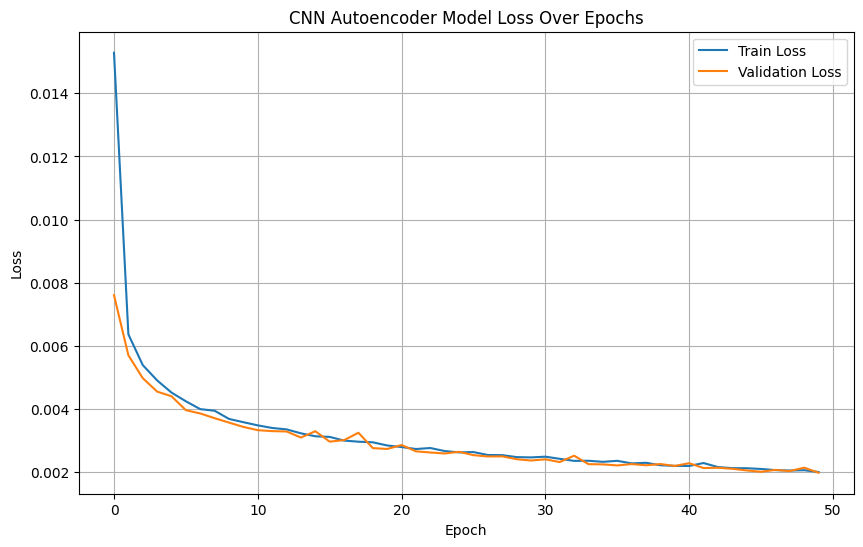

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history_cnn_autoencoder.history['loss'], label='Train Loss')
plt.plot(history_cnn_autoencoder.history['val_loss'], label='Validation Loss')
plt.title('CNN Autoencoder Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


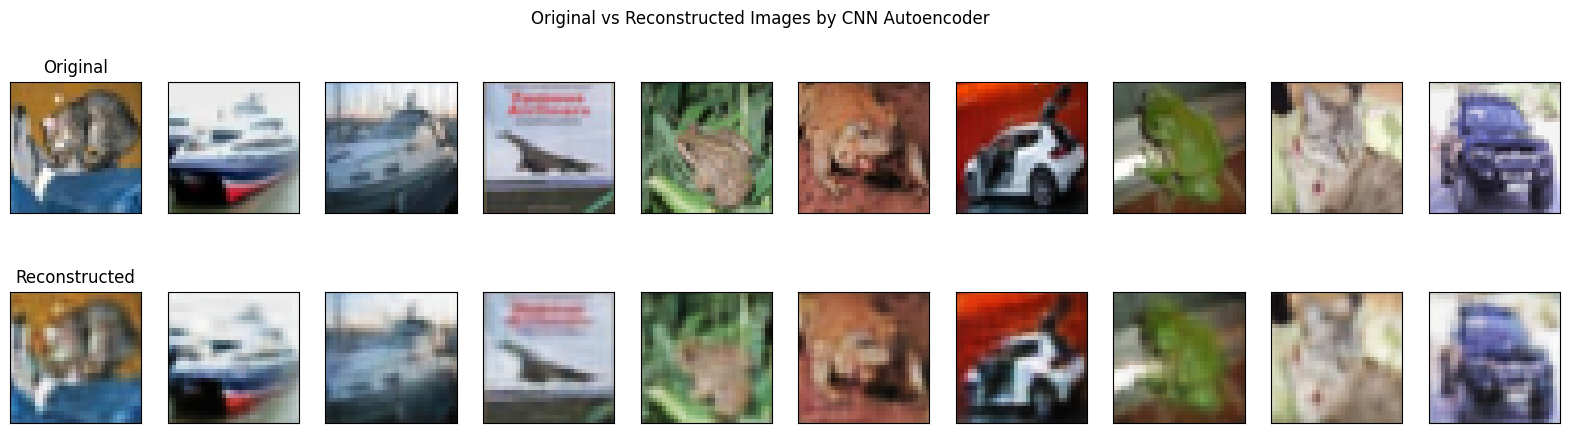

In [ ]:
import matplotlib.pyplot as plt

# Use the CNN autoencoder to reconstruct images from the test set
cnn_reconstructed_images = cnn_autoencoder.predict(x_test)

# Number of images to display
n = 10
plt.figure(figsize=(20, 5))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0:
        ax.set_title('Original')

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(cnn_reconstructed_images[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0:
        ax.set_title('Reconstructed')
plt.suptitle('Original vs Reconstructed Images by CNN Autoencoder')
plt.show()

> # **AutoEncoder CNN model (CIFAR 10 ) with Noise**

## Define CNN Denoising Autoencoder Model

### Subtask:
Define a CNN-based autoencoder architecture with an encoder and decoder using `Conv2D`, `MaxPooling2D`, and `UpSampling2D` layers. The model's input shape will be (32, 32, 3) for the CIFAR-10 images. The output should also be (32, 32, 3) to reconstruct the clean image.


In [18]:
# Add random noise to the images
import numpy as np

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip the values to ensure they are still within the [0, 1] range
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

print(f"Shape of x_train_noisy: {x_train_noisy.shape}")
print(f"Shape of x_test_noisy: {x_test_noisy.shape}")

Shape of x_train_noisy: (50000, 32, 32, 3)
Shape of x_test_noisy: (10000, 32, 32, 3)


In [21]:
epochs_denoise = 50
batch_size_denoise = 256

history_cnn_denoising_autoencoder = autoencoder.fit(x_train_noisy, x_train, # Input is noisy, target is clean
                                                epochs=epochs_denoise,
                                                batch_size=batch_size_denoise,
                                                shuffle=True,
                                                validation_data=(x_test_noisy, x_test))

Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.0505 - val_loss: 0.0323
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0304 - val_loss: 0.0255
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0241 - val_loss: 0.0227
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0210 - val_loss: 0.0200
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0194 - val_loss: 0.0188
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0186 - val_loss: 0.0180
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0179 - val_loss: 0.0179
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0174 - val_loss: 0.0174
Epoch 9/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0170 - val_loss: 0.0168
Epoch 10/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0166 - val_loss: 0.0166
Epoch 11/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0163 - val_loss: 0.0164
Epoch 12/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/ste

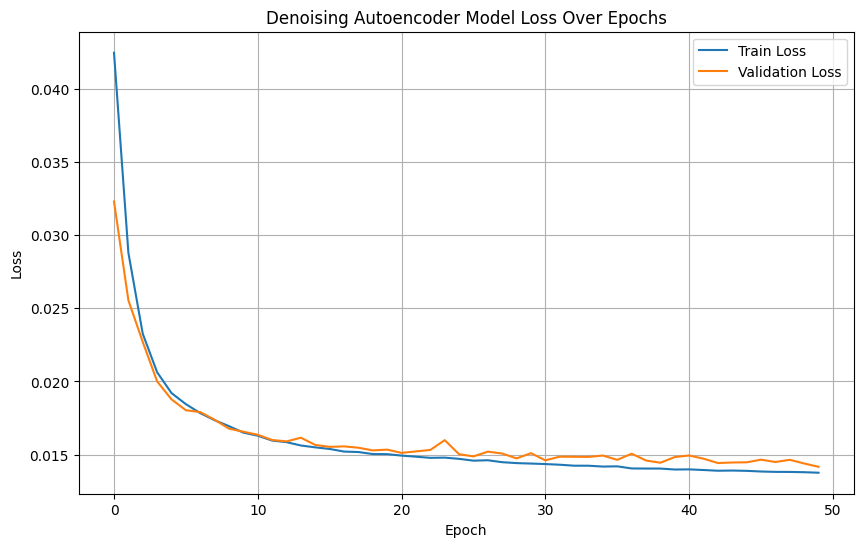

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history_cnn_denoising_autoencoder.history['loss'], label='Train Loss')
plt.plot(history_cnn_denoising_autoencoder.history['val_loss'], label='Validation Loss')
plt.title('Denoising Autoencoder Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


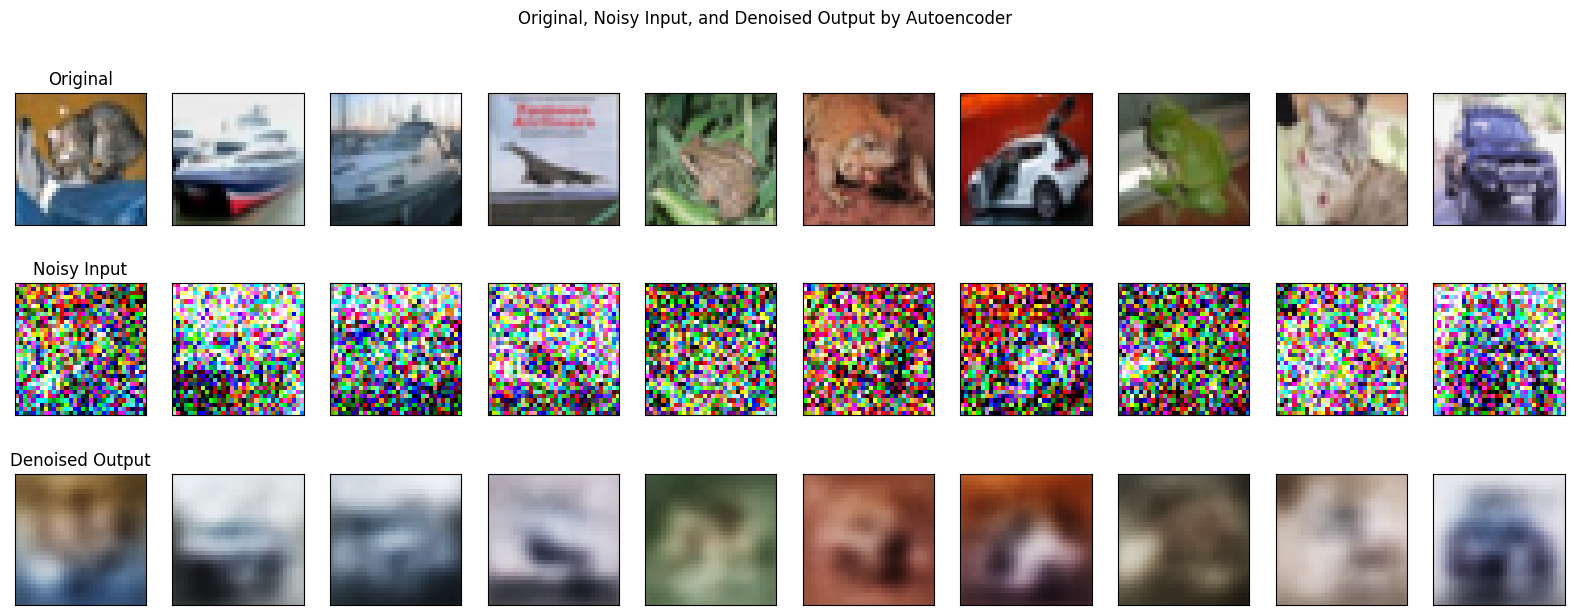

In [23]:
import matplotlib.pyplot as plt

# Use the cnn_autoencoder to reconstruct (denoise) images from the noisy test set
CNN_denoised_images = autoencoder.predict(x_test_noisy)

# Number of images to display
n = 10
plt.figure(figsize=(20, 7))
for i in range(n):
    # Original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0:
        ax.set_title('Original')

    # Noisy images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0:
        ax.set_title('Noisy Input')

    # Denoised images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(CNN_denoised_images[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0:
        ax.set_title('Denoised Output')
plt.suptitle('Original, Noisy Input, and Denoised Output by Autoencoder')
plt.show()